In [ ]:
!nvidia-smi

Wed Dec 28 02:03:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 45%   30C    P5    N/A /  75W |   3865MiB /  4096MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn import preprocessing

**Loading Data**

In [ ]:
df = pd.read_csv("Bangla Comments _ Emotions.csv")
df.head(10)
df=df

In [ ]:
print(df.shape)
df.columns

(14999, 5)


Index(['  Comments', 'Ankon', 'Rizvi', 'Sourov', 'FinalTag'], dtype='object')

In [ ]:
df.rename(columns = {'  Comments':'Comments'}, inplace = True)
df.columns

Index(['Comments', 'Ankon', 'Rizvi', 'Sourov', 'FinalTag'], dtype='object')

In [ ]:
df.nunique()

Comments    14903
Ankon           8
Rizvi           8
Sourov          8
FinalTag        8
dtype: int64

In [ ]:
df['FinalTag'].unique()

array(['Sadness', 'Anger', 'Sarcasm', 'Disgust', 'Surprise', 'Fear',
       'Happiness', 'Undefined'], dtype=object)

In [ ]:
# merged Sarcasm and Undifined in Others tag
df['FinalTag'] = df['FinalTag'].replace(['Sarcasm','Undefined'], 'Others')

In [ ]:
df['FinalTag'].unique()

array(['Sadness', 'Anger', 'Others', 'Disgust', 'Surprise', 'Fear',
       'Happiness'], dtype=object)

**Calculating Total Duplicate Comments and dropping it**

In [ ]:
print("Total Duplicate comments:" ,len(df['Comments'])-len(df['Comments'].drop_duplicates()))
df.drop_duplicates(subset='Comments',keep="first", inplace=True)
df.shape

Total Duplicate comments: 95


(14904, 5)

**Dropping null values**

In [ ]:
#checking null value
df.isnull().sum()

Comments    1
Ankon       0
Rizvi       0
Sourov      0
FinalTag    0
dtype: int64

In [ ]:
#dropping null values
df=df.dropna()
df.shape

(14903, 5)

In [ ]:
#dropping some columns
data=df.drop(['Ankon', 'Rizvi', 'Sourov'], axis=1)
data

,Comments,FinalTag
0,"বিশ্ববিদ্যালয়ে শিক্ষক রাজনীতি, ছাত্র রাজনীতি ...",Sadness
1,পাকিস্তান যেই তালিকায় থাকে ওই তালিকা আমরা এমনে...,Anger
2,"সিংগাপুরের সাথে ভারত, পাকিস্তানের তুলনা কেন? আ...",Others
3,আমাদের দেশের শিক্ষা প্রতিষ্ঠানগুলোতে পড়ালেখার...,Sadness
4,আমাদের দেশের শিক্ষা প্রতিষ্ঠান রাজনীতিতে প্রথম...,Disgust
...,...,...
14994,হায়রে কষ্ট,Sadness
14995,"শুধু মাত্র আর্জেন্টিনা নয়, বাংলাদেশ একই পরিস্থ...",Sadness
14996,গার্মেন্টস মালিকদের মিথ্যাচারে আমাদের সরকার হয়...,Fear
14997,জঘন্য একজন মানুষ,Disgust


**Text Cleaning**

In [ ]:
#removing pancuations and emojis
def clean_comment(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [ ]:
#calling function
data['cleaned_comments'] = data['Comments']

In [ ]:
#Testing 
test=[0,3,12,236,273,1978]
for i in test:
  print("Before Cleaning: {} ".format(data.at[i,"Comments"]))
  print("After Cleaning: {} ".format(data.at[i,"cleaned_comments"]))

Before Cleaning: বিশ্ববিদ্যালয়ে শিক্ষক রাজনীতি, ছাত্র রাজনীতি চিরতরে নিষিদ্ধ না করলে শিক্ষার মান যেটুকু আছে তাও হারিয়ে যাবে। 
After Cleaning: বিশ্ববিদ্যালয়ে শিক্ষক রাজনীতি, ছাত্র রাজনীতি চিরতরে নিষিদ্ধ না করলে শিক্ষার মান যেটুকু আছে তাও হারিয়ে যাবে। 
Before Cleaning: আমাদের দেশের শিক্ষা প্রতিষ্ঠানগুলোতে পড়ালেখার চাইতে রাজনীতি শিখতে ব্যস্ত থাকতে হয়। তাই ভালো মানের শিক্ষাঙ্গন নেই। 
After Cleaning: আমাদের দেশের শিক্ষা প্রতিষ্ঠানগুলোতে পড়ালেখার চাইতে রাজনীতি শিখতে ব্যস্ত থাকতে হয়। তাই ভালো মানের শিক্ষাঙ্গন নেই। 
Before Cleaning: শিক্ষাই আলো,,অনেক দিন ধরে জ্বলছে তো, তেল ফুরিয়ে গেছে। 
After Cleaning: শিক্ষাই আলো,,অনেক দিন ধরে জ্বলছে তো, তেল ফুরিয়ে গেছে। 
Before Cleaning: এরা শিক্ষিত পাগল😡 
After Cleaning: এরা শিক্ষিত পাগল😡 
Before Cleaning: গাধা পানি খায় তবে ঘোলা করে খায় 🤣🤣🤣 
After Cleaning: গাধা পানি খায় তবে ঘোলা করে খায় 🤣🤣🤣 
Before Cleaning: এখন অনেক শিক্ষকই (সবাই না) রাজনীতি করে নিজ ভিত্তি প্রস্তর মজমুদ রাখার জন্য। যেটা আগে ছিলো না। 
After Cleaning: এখন অনেক শিক্ষকই (সবাই না

In [ ]:
# pip install bnlp_toolkit

**Comment Length Check**

In [ ]:
#total Cleaned comments
total_comments=data["cleaned_comments"].count()
print("Tatal Number of cleaned Comments:", total_comments)

Tatal Number of cleaned Comments: 14419


In [ ]:
#calculating word length of comments
def length_distribution(comments):
  comment_length=[]
  
  for comment in comments:
    comment_length.append(len(comment.split()))


  freq = dict()
  for i in comment_length:
    freq[i] = freq.get(i, 0)+1


  length=np.array(comment_length)
  return length.max(),length.min(),freq
    

In [ ]:
max_length,min_length,frequency = length_distribution(data["cleaned_comments"])
print("Maximum Comment Size: ", max_length)
print("Minimum Comment Size: ",min_length)


Maximum Comment Size:  86
Minimum Comment Size:  3


**Remove Comments less than 3 words**

In [ ]:
data["length"] = data['cleaned_comments'].apply(lambda x:len(x.split()))
data.drop(data[data['length'] < 3].index, inplace = True)
print("Total comments removed: {}".format(total_comments-len(data["cleaned_comments"])))
total_comments=len(data["cleaned_comments"])
data.shape

Total comments removed: 0


(14419, 4)

**DataSet Summary**

In [ ]:
# counting frequency of comments in each tag
print("Total comments in each tag")
data["FinalTag"].value_counts()

Total comments in each tag


Sadness      4040
Happiness    3889
Disgust      3354
Anger        1704
Fear          753
Others        349
Surprise      330
Name: FinalTag, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


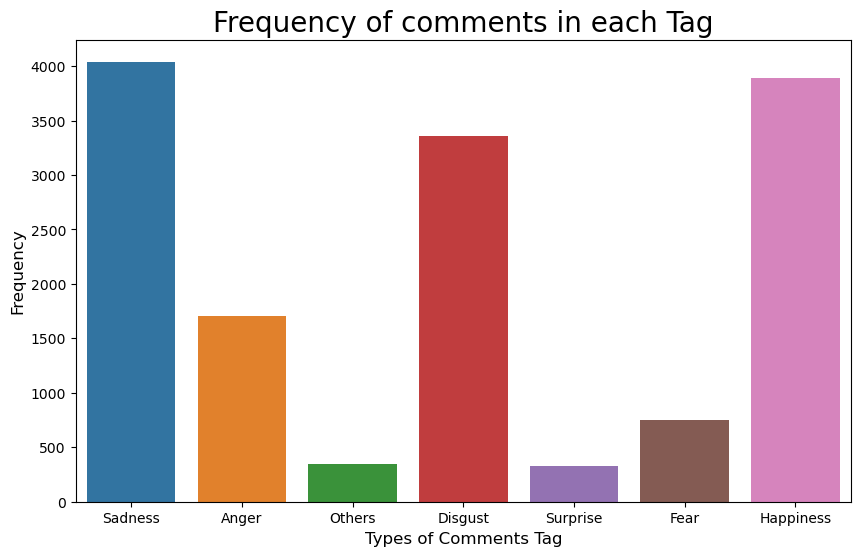

In [ ]:
# plotting Frequency of comments in each Tag 
plt.figure(figsize=(10,6))
sb.countplot(data["FinalTag"])
plt.xlabel("Types of Comments Tag", size=12)
plt.ylabel("Frequency", size=12)
plt.title("Frequency of comments in each Tag", size=20)
plt.show()


In [ ]:
#each comment's tag percentages in dataset
parcentages=(data['FinalTag'].value_counts()/data['FinalTag'].count())*100
comment_tag=parcentages.index
print("Each Comment's tag Percentages in Dataset\n", parcentages)
# print(type(list(comment_tag)))

Each Comment's tag Percentages in Dataset
 Sadness      28.018587
Happiness    26.971357
Disgust      23.260975
Anger        11.817740
Fear          5.222276
Others        2.420418
Surprise      2.288647
Name: FinalTag, dtype: float64


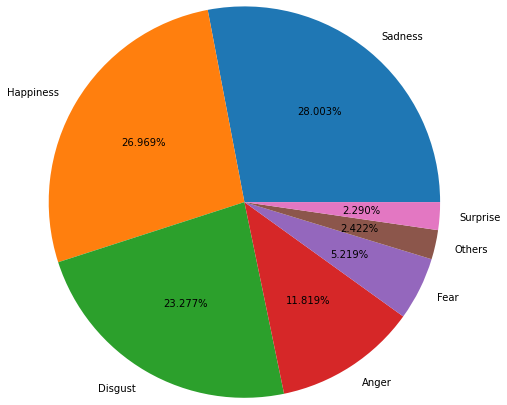

In [ ]:
plt.figure(figsize=(4,3))
plt.pie(parcentages,labels =comment_tag,autopct='%1.3f%%',radius = 3)
plt.show()

In [ ]:
# calculating total word for each comment's tag 
def countWords(df):
  total_words_per_tag=dict.fromkeys(comment_tag,  0)
  total_comments_per_tag=dict.fromkeys(comment_tag,  0)


 
  for ind in df.index:
    tag=df['FinalTag'][ind]
    comment=df['cleaned_comments'][ind]
    total_words_per_tag[tag]=total_words_per_tag.get(tag)+len(comment.split())
    total_comments_per_tag[tag]=total_comments_per_tag.get(tag)+1   

  return  total_words_per_tag,total_comments_per_tag



In [ ]:
# function calling
words_per_Tag, comments_per_tag=countWords(data)

In [ ]:
#calculating total words in dataset
total_words=sum(words_per_Tag.values())

In [ ]:
print("Total number words in dataset:", total_words)
print("Total Words in Each Comment's Tag:")
for tag in words_per_Tag:
  print(tag, ":", words_per_Tag[tag])

Total number words in dataset: 142911
Total Words in Each Comment's Tag:
Sadness : 42108
Happiness : 34079
Disgust : 35389
Anger : 17935
Fear : 7385
Others : 3223
Surprise : 2792


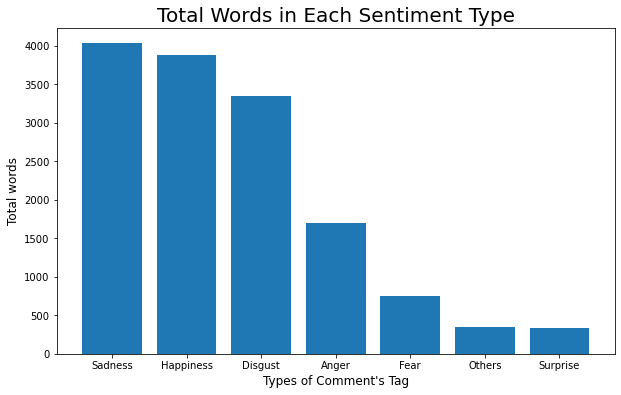

In [ ]:
#ploting total words for each comment's tag
plt.figure(figsize=(10,6))
plt.bar(words_per_Tag.keys(),comments_per_tag.values())
plt.xlabel("Types of Comment's Tag", size=12)
plt.ylabel("Total words", size=12)
plt.title("Total Words in Each Sentiment Type", size=20)
plt.show()

In [ ]:
# calculating average word for each tag
average_word_per_tag=dict.fromkeys(comment_tag,  0)

for tag in comment_tag:
  average_word_per_tag[tag]=round(words_per_Tag[tag]/comments_per_tag[tag])

print("Average Words in Each Comment's Tag:")
for tag in average_word_per_tag:
  print(tag, ":", average_word_per_tag[tag])

Average Words in Each Comment's Tag:
Sadness : 10
Happiness : 9
Disgust : 11
Anger : 11
Fear : 10
Others : 9
Surprise : 8


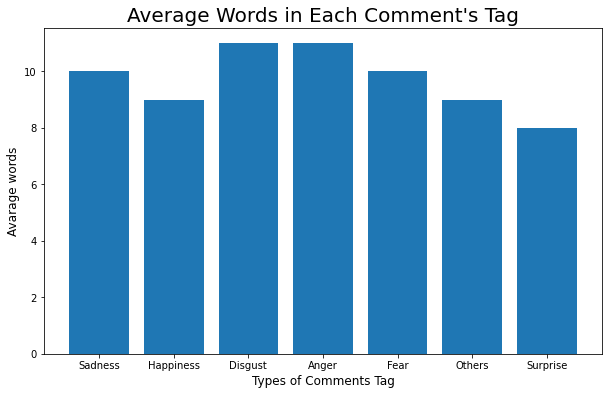

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(average_word_per_tag.keys(),average_word_per_tag.values())
plt.xlabel("Types of Comments Tag", size=12)
plt.ylabel("Avarage words", size=12)
plt.title("Average Words in Each Comment's Tag", size=20)
plt.show()

In [ ]:
#calculating total unique word in dataset
def count_total_uniquewords(df):
  word_list=[]
  for comment in list(df["cleaned_comments"]):
    for word in comment.split():
      word_list.append(word)
 
  # print(len(word_list))
  return word_list, len(np.unique(word_list))

  
    

In [ ]:
#total unique words
word_list, total_unique_words=count_total_uniquewords(data)
print("Total Unique words in Dataset: ",total_unique_words)

Total Unique words in Dataset:  19276


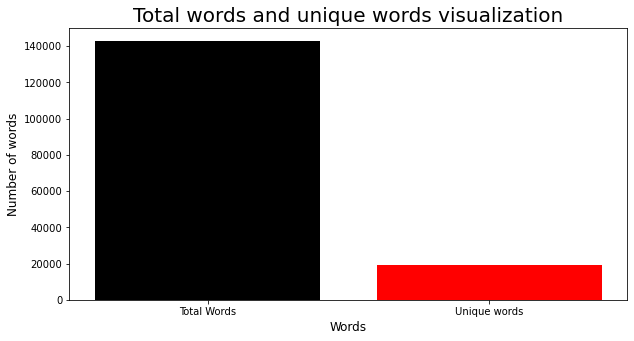

In [ ]:
#ploting total words and unique words in bar chart
plt.figure(figsize=(10,5))
c = ['black', 'red']
plt.bar(["Total Words","Unique words"],[total_words,total_unique_words],color=c)
plt.xlabel("Words", size=12)
plt.ylabel("Number of words", size=12)
plt.title("Total words and unique words visualization", size=20)
plt.show()

In [ ]:
#calculating words frequency
def cal_words_frecuncy():
  counts = dict()
  for word in word_list:
   counts[word] = counts.get(word, 0)+1

  return counts

In [ ]:
words_frecuncy=cal_words_frecuncy()
sorted_words_frecuncy =sorted(words_frecuncy.items(), key= lambda item: item[1],reverse = True)

In [ ]:
print("Top 20 Frequent Word in Dataset:")
for word,freq in sorted_words_frecuncy[:20]:
              print("{} : {}".format(word,freq))

Top 20 Frequent Word in Dataset:
না : 2530
এই : 1511
করে : 1492
আর : 1177
জন্য : 951
কি : 913
হবে : 893
ভালো : 781
করা : 734
মানুষ : 729
ও : 691
আমাদের : 683
হয় : 662
অনেক : 655
থেকে : 631
দেশের : 605
কথা : 605
আছে : 600
একটা : 590
সব : 566


**Comment Length Distribution**

Maximum Comment Size:  86
Minimum Comment Size:  3
Average Comment Size:  9.918176139912555


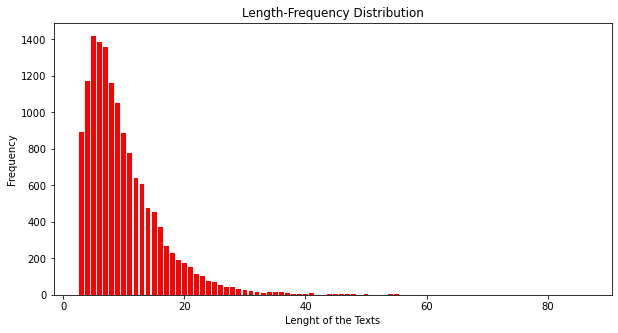

In [ ]:
max_length,min_length,frequency = length_distribution(data["cleaned_comments"])
avarage_length=total_words/total_comments
print("Maximum Comment Size: ", max_length)
print("Minimum Comment Size: ",min_length)
print("Average Comment Size: ", avarage_length)

plt.figure(figsize=(10,5))
plt.bar(frequency.keys(), frequency.values(), color ="r")
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  

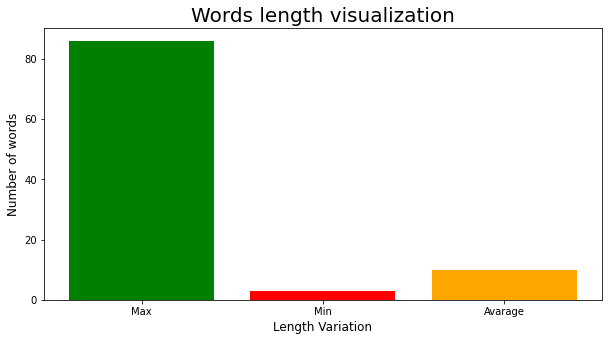

In [ ]:
#ploting length distribution
plt.figure(figsize=(10,5))
c = ['green', 'red','orange']
plt.bar(["Max","Min","Avarage"],[max_length,min_length,avarage_length],color=c)
plt.xlabel("Length Variation", size=12)
plt.ylabel("Number of words", size=12)
plt.title("Words length visualization", size=20)
plt.show()

**BanglaBERT**

In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoTokenizer, AutoModelForPreTraining

tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")

model = AutoModelForPreTraining.from_pretrained("csebuetnlp/banglabert")

loading configuration file config.json from cache at C:\Users\user/.cache\huggingface\hub\models--csebuetnlp--banglabert\snapshots\9ce791f330578f50da6bc52b54205166fb5d1c8c\config.json
Model config ElectraConfig {
  "_name_or_path": "csebuetnlp/banglabert",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading file vocab.txt from cac

In [ ]:
# specital tokens
print(tokenizer.unk_token, tokenizer.unk_token_id)
print(tokenizer.pad_token, tokenizer.pad_token_id)
print(tokenizer.cls_token, tokenizer.cls_token_id)
print(tokenizer.sep_token, tokenizer.sep_token_id)

[UNK] 1
[PAD] 0
[CLS] 2
[SEP] 3


In [ ]:
maximum_length=128

In [ ]:
sample_txt="ভালো থেকো এবং আবার ফিরে এসো তোমার অপেক্ষায় আমরা"

In [ ]:
sample_encoding = tokenizer(
  sample_txt,
  max_length=maximum_length,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
sample_encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
sample_encoding['input_ids'][0]

tensor([    2,  1055, 10596,   903,  1148,  1557,  4917,  1188,     1,  1062,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
sample_encoding['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_main, y_train, y_main = train_test_split(data['cleaned_comments'], data['FinalTag'], test_size = 0.2, random_state = 0)
X_test, X_val, y_test, y_val= train_test_split(X_main, y_main, test_size = 0.5, random_state = 0)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.fit_transform(y_test)
y_val=label_encoder.fit_transform(y_val)


In [ ]:
train_encodings =  tokenizer.batch_encode_plus(list(X_train), max_length=maximum_length,
  add_special_tokens=True, 
  pad_to_max_length=True,
   return_token_type_ids=False,
  return_attention_mask=True,
   return_tensors='pt',  
)

test_encodings =  tokenizer.batch_encode_plus(list(X_test), max_length=maximum_length,
  add_special_tokens=True, 
  pad_to_max_length=True,
   return_token_type_ids=False,
  return_attention_mask=True,
   return_tensors='pt',
)

val_encodings =  tokenizer.batch_encode_plus(list(X_val), max_length=maximum_length,
  add_special_tokens=True, 
  pad_to_max_length=True,
   return_token_type_ids=False,
  return_attention_mask=True,
   return_tensors='pt',
)


In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)



In [ ]:
train_dataset = Dataset(train_encodings, y_train)
val_dataset = Dataset(val_encodings, y_val)
test_dataset =Dataset(test_encodings, y_test)

In [ ]:
train_dataset[7]

C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'input_ids': tensor([    2,  1062, 27516,   830,     1,  1632,     1,  1011,  2591,  1482,
          2397,   205,     3,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
from transformers import   AutoModelForSequenceClassification, Trainer, TrainingArguments,AdamW
model = AutoModelForSequenceClassification.from_pretrained("csebuetnlp/banglabert",num_labels=7)

loading configuration file config.json from cache at C:\Users\user/.cache\huggingface\hub\models--csebuetnlp--banglabert\snapshots\9ce791f330578f50da6bc52b54205166fb5d1c8c\config.json
Model config ElectraConfig {
  "_name_or_path": "csebuetnlp/banglabert",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_toke

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics(p):
#     print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average='weighted')
    precision = precision_score(y_true=labels, y_pred=pred, average='weighted')
    f1 = f1_score(y_true=labels, y_pred=pred,average='weighted')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
from transformers import EarlyStoppingCallback, IntervalStrategy
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=30,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=721,
    # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy = IntervalStrategy.STEPS, # "steps"
   save_steps=721,
    eval_steps = 721,
    metric_for_best_model = 'accuracy',
   load_best_model_at_end=True
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=5)]
)



In [ ]:
trainer.train()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 11535
  Num Epochs = 30
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 21630
  Number of trainable parameters = 110622727
C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
721,1.124000,1.040128,0.636616,0.618755,0.636616,0.612885
1442,0.820900,1.007991,0.651179,0.657552,0.651179,0.638617
2163,0.628400,1.104714,0.648405,0.650271,0.648405,0.647784
2884,0.444100,1.426013,0.626907,0.632831,0.626907,0.622512
3605,0.257800,1.535557,0.629681,0.655666,0.629681,0.627929
4326,0.442100,1.843155,0.638003,0.653027,0.638003,0.638383
5047,0.271500,1.993650,0.640777,0.644038,0.640777,0.641259


***** Running Evaluation *****
  Num examples = 1442
  Batch size = 8
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to ./results\checkpoint-721
Configuration saved in ./results\checkpoint-721\config.json
Model weights saved in ./results\checkpoint-721\pytorch_model.bin
C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
***** Running Evaluation *****
  Num examples = 1442
  Batch size = 8
Saving model checkpoint to ./results\chec

TrainOutput(global_step=5047, training_loss=0.5825007890259036, metrics={'train_runtime': 30663.3414, 'train_samples_per_second': 11.285, 'train_steps_per_second': 0.705, 'total_flos': 5311463978016000.0, 'train_loss': 0.5825007890259036, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1442
  Batch size = 8
C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 1.0079913139343262,
 'eval_accuracy': 0.6511789181692095,
 'eval_precision': 0.6575523085792597,
 'eval_recall': 0.6511789181692095,
 'eval_f1': 0.6386166334346852,
 'eval_runtime': 181.1694,
 'eval_samples_per_second': 7.959,
 'eval_steps_per_second': 0.999,
 'epoch': 7.0}

In [ ]:
trainer.predict(train_dataset)

***** Running Prediction *****
  Num examples = 11535
  Batch size = 8
C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


PredictionOutput(predictions=array([[-0.5773304 ,  0.8840705 , -1.1440036 , ...,  0.38880208,
        -0.1521293 , -0.21228783],
       [-1.9985436 , -0.32743374, -1.7802212 , ..., -0.64676166,
        -0.2939616 , -0.9868685 ],
       [ 0.13690472, -0.08147243, -0.8187586 , ...,  0.5886284 ,
        -0.15313199, -1.3933132 ],
       ...,
       [-2.0548806 , -0.6990185 , -1.6387058 , ..., -0.83927226,
        -0.20576325, -1.2965587 ],
       [ 3.6970005 ,  1.0688374 , -1.2022165 , ..., -0.9335574 ,
        -0.6556297 , -1.8582381 ],
       [-2.1237912 , -0.7295991 , -1.6286161 , ..., -0.82473624,
         0.02535363, -1.4026864 ]], dtype=float32), label_ids=array([4, 3, 3, ..., 3, 0, 3], dtype=int64), metrics={'test_loss': 0.6244715452194214, 'test_accuracy': 0.7901170351105331, 'test_precision': 0.8015745206029657, 'test_recall': 0.7901170351105331, 'test_f1': 0.7784935955260566, 'test_runtime': 1490.525, 'test_samples_per_second': 7.739, 'test_steps_per_second': 0.967})

In [ ]:
# Training accuracy
train_pred=trainer.predict(train_dataset)[0]
train_predicted = np.argmax(train_pred, axis = 1)
print("Training Accuracy",accuracy_score(y_train, train_predicted))

***** Running Prediction *****
  Num examples = 11535
  Batch size = 8
C:\Users\user\AppData\Local\Temp\ipykernel_4504\3028203196.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Training Accuracy 0.7901170351105331


In [ ]:
# validation accuracy
pred=trainer.predict(val_dataset)[0]
y_predicted = np.argmax(pred, axis = 1)
print("val accuracy", accuracy_score(y_val, y_predicted))

val accuracy 0.6511789181692095


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
target_names=['Anger','Disgust','Fear','Happiness','Others','Sadness', 'Surprise' ]
print(classification_report(y_val,y_predicted,target_names=target_names))

              precision    recall  f1-score   support

       Anger       0.77      0.43      0.55       175
     Disgust       0.52      0.70      0.60       317
        Fear       0.44      0.61      0.51        85
   Happiness       0.76      0.91      0.83       388
      Others       0.00      0.00      0.00        31
     Sadness       0.74      0.54      0.63       413
    Surprise       0.41      0.27      0.33        33

    accuracy                           0.65      1442
   macro avg       0.52      0.50      0.49      1442
weighted avg       0.66      0.65      0.64      1442



In [ ]:
trainer.save_model("my_bert")

Saving model checkpoint to my_bert
Configuration saved in my_bert\config.json
Model weights saved in my_bert\pytorch_model.bin


In [ ]:
cm=confusion_matrix(y_val, y_predicted)
print(cm)

[[ 76  72   7   6   0  12   2]
 [ 14 223  11  30   0  35   4]
 [  2   7  52   7   1  16   0]
 [  4  14   4 354   0  11   1]
 [  1   8   4  12   0   3   3]
 [  1  95  39  50   0 225   3]
 [  1  10   2   7   0   4   9]]


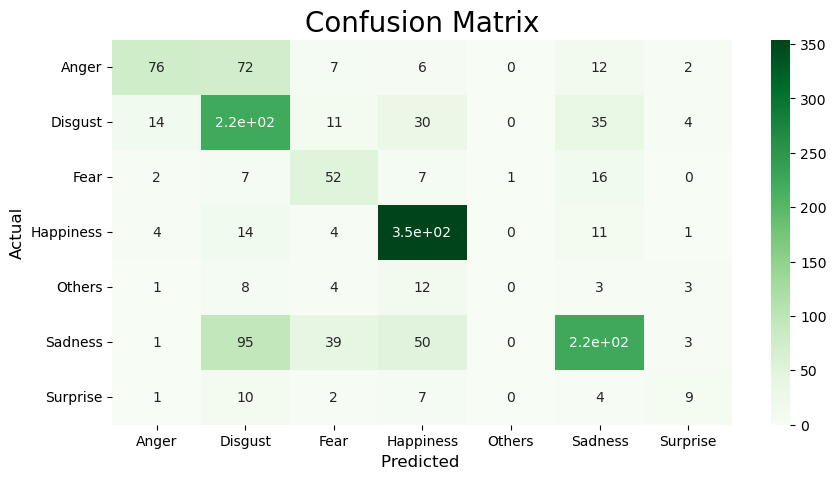

In [ ]:
plt.figure(figsize=(10,5))
sb.heatmap(cm, cmap="Greens", annot=True,
           xticklabels=['Anger','Disgust','Fear','Happiness','Others','Sadness', 'Surprise' ],
           yticklabels=['Anger','Disgust','Fear','Happiness','Others','Sadness', 'Surprise' ])  


plt.xlabel("Predicted ", size=12)
plt.ylabel("Actual", size=12)
plt.title("Confusion Matrix", size=20)
plt.show()